In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score,RandomizedSearchCV,KFold,GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
import joblib
import warnings
warnings.filterwarnings('ignore')

In [24]:
df=pd.read_csv('Titanic.csv')

In [25]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [26]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Obsarvation:- 
###### Name, Sex, Ticket, Cabin and Embarked are String Data type, 
###### while Fare and Age are float type variable. 
###### PassengerId ,Pclass,SibSp,Parch are integer variable, 
###### Survived is binary variable but it is already enoded in 0 or 1 where 1 represent Yes and 0 denotes No.

In [27]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [28]:
df.shape

(891, 12)

<AxesSubplot:xlabel='Survived', ylabel='count'>

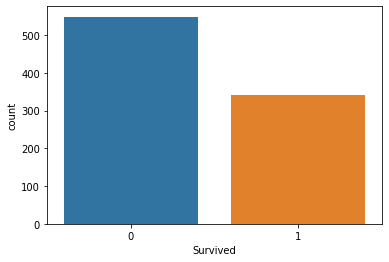

In [29]:
sns.countplot(df['Survived'])

# Observation:- Data is not imbalance.

#### Total 891 row and 12 variable present in dataset.

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Obsarvation:- 
###### Age, Cabin and Embarked variable has missing or NaN values present.

In [31]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Observation:- 
###### Age variable has 177, cabin 687 , Embarked 2 NaN(Null) values 

Text(0.5, 1.0, 'Null Value Heat Map')

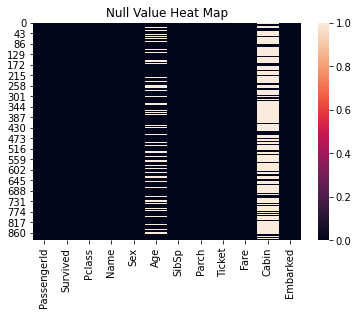

In [32]:
sns.heatmap(df.isnull())
plt.title("Null Value Heat Map")

# Obsarvation:- 
1. PassengerId, Name and Ticket vaiable are unique in dataset we can drop these columns.
2. Cabin has around 77% values missing and it is string data type, encoding and imputing value in this variable will not give much benfit in prediction.

In [33]:
df.drop(columns=['PassengerId','Name', 'Ticket', 'Cabin'], inplace = True)

In [34]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

## Observation:-
1. Age and Embarked column has missing value.



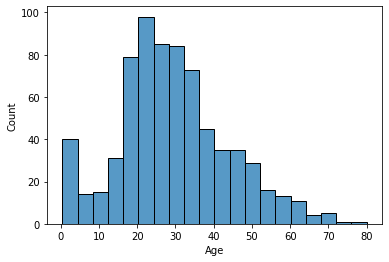

In [35]:
sns.histplot(df['Age'])
plt.show()

In [36]:
df['Age'].skew()

0.38910778230082704

## Observation:- 
#### Age Variable do not have skewness skewness , Hence value impute on mean will be more effecient 

In [37]:
import numpy as np
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan,strategy="mean")

df["Age"]=imp.fit_transform(df["Age"].values.reshape(-1,1))

In [38]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [39]:
df.loc[df['Age'] <= 16, 'Age'] = 0
df.loc[(df['Age'] > 16) & (df['Age'] <= 26), 'Age'] = 1
df.loc[(df['Age'] > 26) & (df['Age'] <= 36), 'Age'] = 2
df.loc[(df['Age'] > 36) & (df['Age'] <= 62), 'Age'] = 3
df.loc[ df['Age'] > 62, 'Age'] = 4

In [40]:
df


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,1.0,1,0,7.2500,S
1,1,1,female,3.0,1,0,71.2833,C
2,1,3,female,1.0,0,0,7.9250,S
3,1,1,female,2.0,1,0,53.1000,S
4,0,3,male,2.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,2.0,0,0,13.0000,S
887,1,1,female,1.0,0,0,30.0000,S
888,0,3,female,2.0,1,2,23.4500,S
889,1,1,male,1.0,0,0,30.0000,C


# Observation:-
## Missing value in Age Veriable as been imputed and now there is no missing data exist in this column.

#### Embarked Column still has 2 missing value, Embarked and Sex are categorical Data hence we will first Encode it with the numerical values, then will replace missing or NaN value with most frequent value(mode of the column).

In [41]:
imp = SimpleImputer(strategy="most_frequent")
df["Embarked"]=imp.fit_transform(df["Embarked"].values.reshape(-1,1))
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,1.0,1,0,7.2500,S
1,1,1,female,3.0,1,0,71.2833,C
2,1,3,female,1.0,0,0,7.9250,S
3,1,1,female,2.0,1,0,53.1000,S
4,0,3,male,2.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,2.0,0,0,13.0000,S
887,1,1,female,1.0,0,0,30.0000,S
888,0,3,female,2.0,1,2,23.4500,S
889,1,1,male,1.0,0,0,30.0000,C


In [42]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

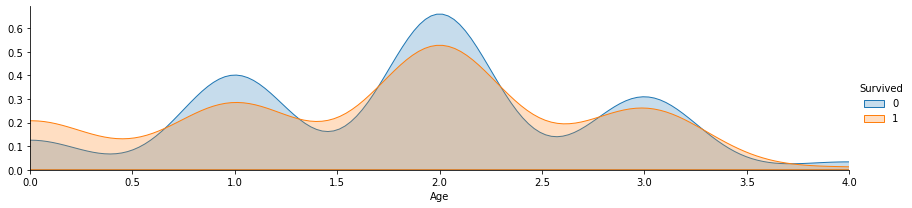

In [43]:
facet = sns.FacetGrid(df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend() 
plt.show()


<AxesSubplot:xlabel='Age', ylabel='count'>

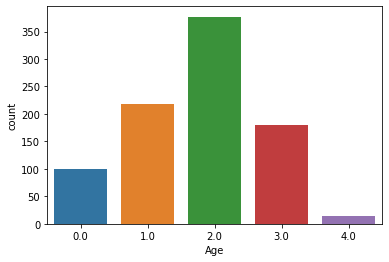

In [44]:
sns.countplot(df['Age'])

### Middle age pessanger death and survived both are high.

###  Highest number of passenger traveling in Titanic belogs to age group >16 to <36 year. that is why death ratio for this group is high.

In [45]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,1.0,1,0,7.2500,S
1,1,1,female,3.0,1,0,71.2833,C
2,1,3,female,1.0,0,0,7.9250,S
3,1,1,female,2.0,1,0,53.1000,S
4,0,3,male,2.0,0,0,8.0500,S


## Observation:- 

Now all data in dataset is in numerical format, will replace NaN Value in Embarked variable with most frequent value.

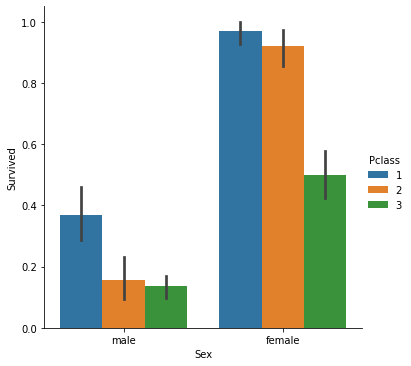

In [46]:
titanic = sns.load_dataset("titanic")
sns.catplot(x="Sex", y="Survived", hue="Pclass", kind="bar", data=df)
plt.show()

# Observation:- 
1. Female Pessanger was survived mostly, death ratio for male Passenger was much high.
2. passender treveling in First class was survived in much numbers, female pessanger trevelling in second class was also having good surivial ratio.


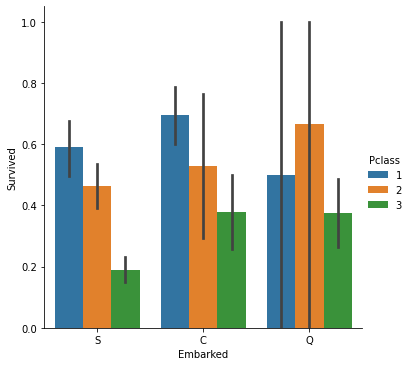

In [47]:
titanic = sns.load_dataset("titanic")
sns.catplot(x="Embarked", y="Survived", hue="Pclass", kind="bar", data=df)
plt.show()

# Observation:- 
Highest number of first class pessanger boarded from S = Southampton and C = Cherbourg ) saved.

In [48]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list1 = ["Embarked","Sex"]
for val in list1:
    df[val]= le.fit_transform(df[val].astype(str))   
    
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,1.0,1,0,7.2500,2
1,1,1,0,3.0,1,0,71.2833,0
2,1,3,0,1.0,0,0,7.9250,2
3,1,1,0,2.0,1,0,53.1000,2
4,0,3,1,2.0,0,0,8.0500,2


## Encoded Embarded Categorical data into numerical values.

In [49]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [50]:
corr_matrix = df.corr()
corr_matrix['Survived'].sort_values(ascending=False)

Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.072077
Embarked   -0.167675
Pclass     -0.338481
Sex        -0.543351
Name: Survived, dtype: float64

In [51]:
#df.drop(columns=['Age'], inplace=True)

## Observation:- Fare is possitive correlation with Survived, Sex is strong negative correlation with Survived. 
1. Indicate that higher fare passanger was save mostly, it is because they were treveling in first or second class and having life saving equipments available no those dacks.
2. People saved most of younger passangers instead of old age passangers.

## Checking for Outliers on age and fare reguler variable.(only theese two variables are reguler data.

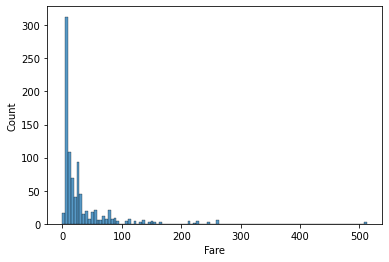

In [52]:
sns.histplot(df['Fare'])
plt.show()

## Observation:- 
1. Data is right Skewed, it should contain outier having high positive values, 

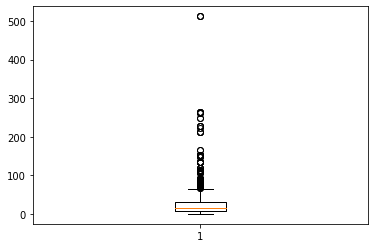

In [53]:
plt.boxplot(df['Fare'])
plt.show()

# Observation:- 
1. Outlier exist in Fare variable, will use IQR to removed these outliers

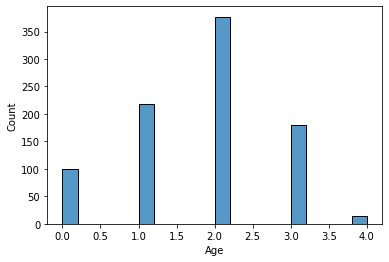

In [54]:
sns.histplot(df['Age'])
plt.show()

## Observation:-
Data is equally distributed, outlier exist in this data are near to whisker

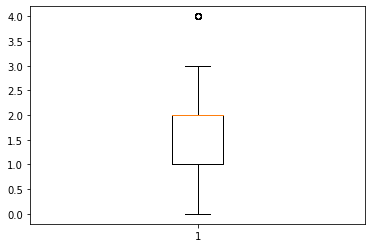

In [55]:
plt.boxplot(df['Age'])
plt.show()

In [56]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age        -0.178370
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Embarked   -1.264823
dtype: float64

# Observation:-
1. Fare and Age are only reguler variable, 

2. other veriable Pclass, SibSp, Parch, Embarked are ctegorical values hence skewness on these variable can not be removed.

3. Age has not skewness.

In [57]:
def outlier_IQR(data_frame, feature_name):
  IQR = data_frame[feature_name].quantile(0.75)-data_frame[feature_name].quantile(0.25)
  lower_bridge = data_frame[feature_name].quantile(0.25) -(IQR*3)
  upper_bridge = data_frame[feature_name].quantile(0.75) + (IQR*3)
  return (lower_bridge,upper_bridge)

In [58]:
l,u = outlier_IQR(df, 'Fare')
df.drop(df[ (df['Fare'] > u) | (df['Fare'] < l) ].index, inplace=True)

In [59]:
df.shape

(838, 8)

In [60]:
print("Total % of data loss after removel of outliers", ((891-838)/891)*100)

Total % of data loss after removel of outliers 5.948372615039282


# Observation:- 
1. Total 4.06% data loss after outlier removel which is acceptable range.

In [61]:
x = df.drop(columns=["Survived"])
y = df["Survived"]

In [62]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,1.0,1,0,7.2500,2
1,1,0,3.0,1,0,71.2833,0
2,3,0,1.0,0,0,7.9250,2
3,1,0,2.0,1,0,53.1000,2
4,3,1,2.0,0,0,8.0500,2


In [63]:
column = ['Fare']
for i in column:
    if x[i].skew() > 0.5:
        x[i]=np.cbrt(x[i])
    if df[i].skew() < -0.5:
        x[i]=np.cbrt(x[i])    

x.skew()   

Pclass     -0.816887
Sex        -0.704575
Age        -0.178371
SibSp       3.753266
Parch       3.009946
Fare        0.242221
Embarked   -1.400325
dtype: float64

## Observation:- Skewness removed

In [64]:
x.shape

(838, 7)

In [65]:
y.shape

(838,)

In [66]:
from sklearn.linear_model import LogisticRegression
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.35,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    acc = accuracy_score(y_test,predrf)
    if acc >maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is", maxAccu, "on Random_state",maxRS)

Best accuracy is 0.8401360544217688 on Random_state 89


In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.42,random_state=89)

In [80]:
lg = LogisticRegression()
lg.fit(x_train,y_train)
pred = lg.predict(x_test)
print("accuracy_score:",)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy_score:
0.84375
[[212  23]
 [ 32  85]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.89       235
           1       0.79      0.73      0.76       117

    accuracy                           0.84       352
   macro avg       0.83      0.81      0.82       352
weighted avg       0.84      0.84      0.84       352



In [81]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
pred = gnb.predict(x_test)
print("accuracy_score:",)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy_score:
0.8039772727272727
[[193  42]
 [ 27  90]]
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       235
           1       0.68      0.77      0.72       117

    accuracy                           0.80       352
   macro avg       0.78      0.80      0.79       352
weighted avg       0.81      0.80      0.81       352



In [82]:
sv = SVC()
sv.fit(x_train,y_train)
pred = sv.predict(x_test)
print("accuracy_score:",)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy_score:
0.8380681818181818
[[211  24]
 [ 33  84]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       235
           1       0.78      0.72      0.75       117

    accuracy                           0.84       352
   macro avg       0.82      0.81      0.81       352
weighted avg       0.84      0.84      0.84       352



In [83]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print("accuracy_score:",)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy_score:
0.8011363636363636
[[205  30]
 [ 40  77]]
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       235
           1       0.72      0.66      0.69       117

    accuracy                           0.80       352
   macro avg       0.78      0.77      0.77       352
weighted avg       0.80      0.80      0.80       352



In [85]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.8153409090909091
[[207  28]
 [ 37  80]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       235
           1       0.74      0.68      0.71       117

    accuracy                           0.82       352
   macro avg       0.79      0.78      0.79       352
weighted avg       0.81      0.82      0.81       352



In [84]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier(n_estimators=100)
ad.fit(x_train,y_train)
pred = ad.predict(x_test)
print("accuracy_score:",)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy_score:
0.8380681818181818
[[206  29]
 [ 28  89]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       235
           1       0.75      0.76      0.76       117

    accuracy                           0.84       352
   macro avg       0.82      0.82      0.82       352
weighted avg       0.84      0.84      0.84       352



In [86]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))   
print(classification_report(y_test,preddt))

0.78125
[[199  36]
 [ 41  76]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       235
           1       0.68      0.65      0.66       117

    accuracy                           0.78       352
   macro avg       0.75      0.75      0.75       352
weighted avg       0.78      0.78      0.78       352



# Cross Validation of predicted and actual value

In [87]:
score=cross_val_score(lg,x,y,cv=5)
#print(score)
print(score.mean())

0.7863843741089249


In [88]:
score=cross_val_score(gnb,x,y,cv=5)
#print(score)
print(score.mean())

0.762610493299116


In [89]:
score=cross_val_score(sv,x,y,cv=5)
#print(score)
print(score.mean())

0.8102580553179355


In [90]:
score=cross_val_score(rf,x,y,cv=5)
#print(score)
print(score.mean())

0.7995580268035358


In [91]:
score=cross_val_score(knn,x,y,cv=5)
#print(score)
print(score.mean())

0.7781080695751355


In [92]:
score=cross_val_score(ad,x,y,cv=5)
#print(score)
print(score.mean())

0.78759623609923


In [93]:
score=cross_val_score(dt,x,y,cv=5)
#print(score)
print(score.mean())

0.7733390362132877


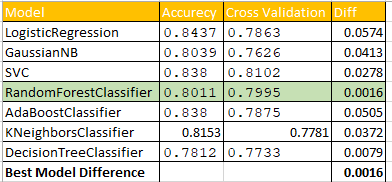

### Best Model is KNeighborsClassifier because its difference of accurecy score and cross validation score is very low.

# Hyper Parameter Tuning for KNeighborsClassifier model.

In [60]:
from sklearn.model_selection import GridSearchCV

In [94]:
#Apply Random SearchCV for Random Forest Model
parameters = {"n_estimators":[100,200], 'criterion' : ['gini', 'entropy'],
              "max_depth":[3,4,5,6,7],"min_samples_split":[2,5,8]
            ,"max_features":['auto', 'sqrt'],"min_samples_leaf":[1,3,5] }
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.35,random_state=67)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
#rf_random = RandomizedSearchCV(estimator = rf, param_distributions = parameters, n_iter = 100, cv = 8, verbose=2, n_jobs = -1)
gcv = GridSearchCV(rf,parameters,cv=5)
# Fit the random search model

result=gcv.fit(x_train, y_train)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.8308698606863745
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


## Observation:
Hyper parameter tuning improved score by 3%, which is good result.


# AUC ROC CURVE

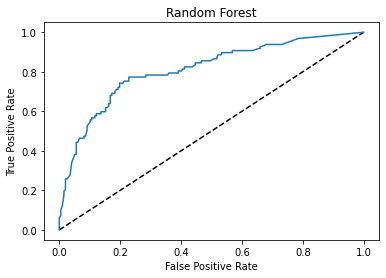

In [106]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
rf.fit(x_train,y_train)
y_pred_prob=rf.predict_proba(x_test)[:,1]
y_pred_prob
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest")
plt.show()